<h1> Input Data Description, Data Cleaning, Data Summary & EDA: Cool Climate Data </h1>

This notebook serves as a workspace for exploratory data analysis of data attained from [Cool Climate Network](https://coolclimate.org/). 

Source: CoolClimate Calculator, U.C. Berkeley CoolClimate Network, 2013, https://coolclimate.org/calculator.

In [1]:
'''!pip install --upgrade pip
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install xlrd'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h1> Input Data Description </h1>


The dataset contains 2014 estimates of annual estimated CO2 emissions from several different categories: 
- household energy (electricity, natural gas and other fuels), 
- transportation (motor vehicles, air travel, other), 
- food, 
- goods, 
- services 
- total emissions

The dataset also includes benchmark estimates of kWh electricity, therms of natural gas, gallons of fuel oil and vehicle miles traveled. 

The data originates from a 2014 research paper authored by Dr. Christopher Jones and Dr. Daniel M. Kammen entitled "Spatial Distribution of U.S. Household Carbon Footprints Reveals Suburbanization Undermines Greenhouse Gas Benefits of Urban Population Density." http://pubs.acs.org/doi/abs/10.1021/es4034364 To attain this data, 

This data was then used to create a [Carbon Footprint Calculator](https://coolclimate.org/calculator).

Permission to use the dataset was granted to our team after filling out a data request form linked [here](https://docs.google.com/forms/d/e/1FAIpQLSdzx772Bq7ZMZP-jmo17JISr0Myau9LDmz8kKdlK5Q-JJUr7A/viewform)--the download link to the data was given which can be referenced linked [here](https://www.dropbox.com/s/xqfduksgt6cmema/Jones-Kammen-2014-Zip-City-County-Results.xlsx?dl=0).

<h1> Data Acquisition and EDA: Structure </h1>

The data is in the form of an excel sheet, and there are several different sheets in them. Here, we pull the sheet with zip codes and convert it into a Pandas dataframe. The data is aggregated by sheets, where in addition to being organized by zip code, they are also spatially organized by City and County. 

Overall, we see that there are 31531 zip code entries, and 31 columns to explore.


In [2]:
cc_zipcode = pd.read_excel('../../data/Jones-Kammen-2014-Zip-City-County-Results.xlsx', sheet_name='zip code results')
cc_zipcode.head()
cc_zipcode.shape

(31531, 31)

<h1> EDA: Granularity/Temporality/Scope </h1>

In terms of the granularity, each row of data represents a zipcode with their **estimated** carbon emissions, with all the data time resolution is over a year's worth of time in 2014. 

Because the scope of our research project focuses on California, we want all of the estimates of California Zipcodes and counties. 

First, we create a new dataframe containing only ZipCodes in California.

We see that there are 1659 zip codes within California.


In [3]:
#all California zipcodes
ca_zipcode = cc_zipcode[cc_zipcode['State'] == 'CA']
ca_zipcode.shape

(1659, 31)

In [4]:
ca_zipcode.head()

,ZipCode,Population,PersonsPerHousehold,AverageHouseValue,IncomePerHousehold,Latitude,Longitude,Elevation,State,StateFullName,...,FUELOIL (gallons),Vehicle miles traveled,Transport (tCO2e/yr),Housing (tCO2e/yr),Food (tCO2e/yr),Goods (tCO2e/yr),Services (tCO2e/yr),Total Household Carbon Footprint (tCO2e/yr),HouseholdsPerZipCode,Total Zip Code Carbon Footprint (tCO2e/yr)
28629,90001,54481,4.35,138900,24207,33.974243,-118.245169,267,CA,California,...,0.000000,15862,10.218853,6.622800,13.05,4.679496,4.317047,38.888196,13302,517290.783459
28630,90002,44584,4.16,127700,22872,33.949380,-118.245060,267,CA,California,...,0.475335,15536,10.018989,7.143323,12.48,4.518860,4.190605,38.351776,11838,454008.330077
28631,90003,58187,4.00,134400,22346,33.963792,-118.274249,267,CA,California,...,0.000000,14614,9.456839,6.890064,12.00,4.449399,4.139889,36.936191,16071,593601.525079
28632,90004,67850,2.91,371100,27591,34.076680,-118.308976,267,CA,California,...,0.578773,13373,9.204518,5.391668,8.73,4.381741,4.535160,32.243087,23922,771319.128605
28633,90005,43014,2.80,392200,21998,34.058999,-118.312752,267,CA,California,...,0.434371,11004,7.551197,4.900292,8.40,3.980317,4.044875,28.876681,15905,459283.617501


What are the columns that we are working with in this dataset?

In [7]:
list(ca_zipcode.columns.values)

['ZipCode',
 'Population',
 'PersonsPerHousehold',
 'AverageHouseValue',
 'IncomePerHousehold',
 'Latitude',
 'Longitude',
 'Elevation',
 'State',
 'StateFullName',
 'City',
 'CountyName',
 'CBSAType',
 'CBSAName',
 'MSAName',
 'PMSA_Name',
 'Region',
 'Division',
 'popden',
 'electricity (kWh)',
 'Nat. Gas (cu.ft.)',
 'FUELOIL (gallons)',
 'Vehicle miles traveled',
 'Transport (tCO2e/yr)',
 'Housing (tCO2e/yr)',
 'Food (tCO2e/yr)',
 'Goods (tCO2e/yr)',
 'Services (tCO2e/yr)',
 'Total Household Carbon Footprint (tCO2e/yr)',
 'HouseholdsPerZipCode',
 'Total Zip Code Carbon Footprint (tCO2e/yr)']

<h1> EDA: Faithfulness </h1>

Looking at the faithfulness of our data, we see that it comes from a published research paper 190 citations at the time of this project, and since then, this dataset has been used by 60 different universities, several government organizations, and many more organizations across the US. 

The data seems to be clean, but our EDA reveals a couple of NaN values that have to deal with places being classified as Core Based Statistical Area (CBSA) versus a Metropolitan Statistical Area (MSA). 

We believe that this might be the case because some cities have smaller populations are may be classified differently as either an MSA/CBSA. 




In [8]:
sum(ca_zipcode.isna().values)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 123,
       123, 283, 725,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0])

In [9]:
is_NaN = ca_zipcode.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = ca_zipcode[row_has_NaN]
rows_with_NaN.iloc[:, range(12,16)].shape #We see that the range of values with NaN values are indexed from 12 through 16
print('There are', rows_with_NaN.iloc[:, range(12,16)].shape[0], 'entries with NaN values.')

There are 725 entries with NaN values.


<h1> Visualizations </h1>

Are we seeing any immediate relationships in the data? Below we plot: 
- The relationship between estimated carbon emission and household size (more people, more emissions?)
- The relationship between estimated carbon emission and income per household (more money, more emissions?)
- The relationship between estimated carbon emission and Vehicle miles traveled (more travelling, more emissions?)
- The relationship between latitude vs. total household carbon footprint

Text(0.5, 1.0, 'Estimated carbon emission vs household size')

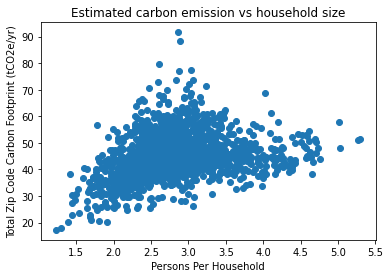

In [10]:
X = ca_zipcode['PersonsPerHousehold']
y = ca_zipcode['Total Household Carbon Footprint (tCO2e/yr)']
plt.scatter(X, y)
plt.xlabel('Persons Per Household')
plt.ylabel('Total Zip Code Carbon Footprint (tCO2e/yr)')
plt.title('Estimated carbon emission vs household size')

#things to consider: The y-scale starts at 0?

Text(0.5, 1.0, 'Estimated carbon emission vs income per household')

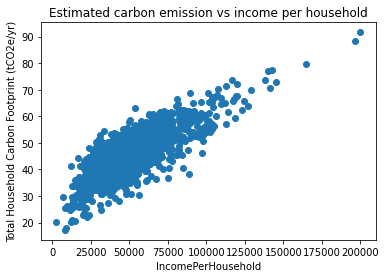

In [11]:
X = ca_zipcode['IncomePerHousehold']
y = ca_zipcode['Total Household Carbon Footprint (tCO2e/yr)']
plt.scatter(X, y)
plt.xlabel('IncomePerHousehold')
plt.ylabel('Total Household Carbon Footprint (tCO2e/yr)')
plt.title('Estimated carbon emission vs income per household')

Text(0.5, 1.0, 'Estimated carbon emission vs Vehicle miles traveled per household')

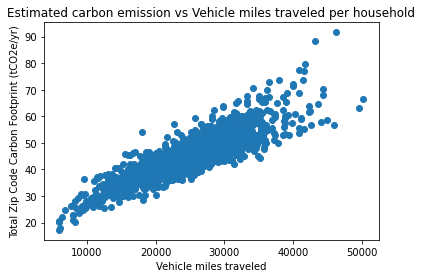

In [12]:
X = ca_zipcode['Vehicle miles traveled']
y = ca_zipcode['Total Household Carbon Footprint (tCO2e/yr)']
plt.scatter(X, y)
plt.xlabel('Vehicle miles traveled')
plt.ylabel('Total Zip Code Carbon Footprint (tCO2e/yr)')
plt.title('Estimated carbon emission vs Vehicle miles traveled per household')

In [23]:
ca_zipcode.head()

,ZipCode,Population,PersonsPerHousehold,AverageHouseValue,IncomePerHousehold,Latitude,Longitude,Elevation,State,StateFullName,...,FUELOIL (gallons),Vehicle miles traveled,Transport (tCO2e/yr),Housing (tCO2e/yr),Food (tCO2e/yr),Goods (tCO2e/yr),Services (tCO2e/yr),Total Household Carbon Footprint (tCO2e/yr),HouseholdsPerZipCode,Total Zip Code Carbon Footprint (tCO2e/yr)
28629,90001,54481,4.35,138900,24207,33.974243,-118.245169,267,CA,California,...,0.000000,15862,10.218853,6.622800,13.05,4.679496,4.317047,38.888196,13302,517290.783459
28630,90002,44584,4.16,127700,22872,33.949380,-118.245060,267,CA,California,...,0.475335,15536,10.018989,7.143323,12.48,4.518860,4.190605,38.351776,11838,454008.330077
28631,90003,58187,4.00,134400,22346,33.963792,-118.274249,267,CA,California,...,0.000000,14614,9.456839,6.890064,12.00,4.449399,4.139889,36.936191,16071,593601.525079
28632,90004,67850,2.91,371100,27591,34.076680,-118.308976,267,CA,California,...,0.578773,13373,9.204518,5.391668,8.73,4.381741,4.535160,32.243087,23922,771319.128605
28633,90005,43014,2.80,392200,21998,34.058999,-118.312752,267,CA,California,...,0.434371,11004,7.551197,4.900292,8.40,3.980317,4.044875,28.876681,15905,459283.617501


Text(0.5, 1.0, 'Latitude vs. Household Carbon Footprint')

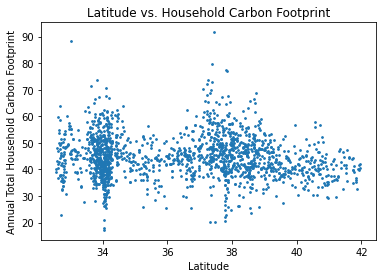

In [24]:
# latitude vs. total household carbon footprint
plt.scatter(ca_zipcode['Latitude'], ca_zipcode['Total Household Carbon Footprint (tCO2e/yr)'], s=3)
plt.xlabel('Latitude')
plt.ylabel('Annual Total Household Carbon Footprint')
plt.title('Latitude vs. Household Carbon Footprint')